In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
cols = [
    'bad', 'kredi_mik', 'mevcut_borc', 'mevcut_mülk_değeri', 'reason',
    'job', 'çalışılan_sene', 'derogatory_reports', 'ödenmemis_kredi', 'clage',
    'son_kredi_sorgu_sayisi', 'kredi_limit_sayisi', 'borç_gelir_oranı'
]
df = pd.read_csv(r'C:\Users\Hp\Desktop\kodluyoruz\ödev_2_kodluyoruz\hmelq.csv' )
dfx = pd.read_csv(r'C:\Users\Hp\Desktop\kodluyoruz\ödev_2_kodluyoruz\hmelq.csv',names=cols )
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [66]:
df.describe()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000,3576.000000
mean,18529.697987,74013.907992,101076.922759,8.832644,0.230425,0.390101,179.832529,1.085850,21.451063,65.146784
std,11262.834060,42039.367757,54371.955751,7.230266,0.816290,1.051780,84.858509,1.686528,9.980645,60.472251
min,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,11000.000000,48577.000000,66250.000000,3.000000,0.000000,0.000000,118.000000,0.000000,15.000000,30.681750
50%,16200.000000,70009.000000,89936.000000,8.000000,0.000000,0.000000,177.855000,0.000000,20.000000,37.156500
75%,23100.000000,88029.000000,118402.250000,12.000000,0.000000,0.000000,227.100000,2.000000,26.000000,43.002750
max,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


In [87]:
df.tail()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
3571,1,8400,31800.000000,72000.000000,DebtCon,Self,8.832644,0.0,2.0,187.27,1.0,21.0,179.832529
3572,1,21600,154991.000000,101076.922759,DebtCon,Self,8.832644,2.0,4.0,165.60,0.0,43.0,38.015000
3573,1,24000,35000.000000,101076.922759,DebtCon,Self,3.000000,1.0,0.0,177.50,0.0,16.0,179.832529
3574,1,10000,74013.907992,25010.000000,HomeImp,Self,5.000000,0.0,3.0,326.13,4.0,17.0,179.832529
3575,1,5900,74013.907992,28000.000000,DebtCon,Self,1.000000,2.0,1.0,36.77,1.0,8.0,179.832529


In [88]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,Other,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,Other,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,Other,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,Other,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,Other,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [143]:
dfx.head()

,bad,kredi_mik,mevcut_borc,mevcut_mülk_değeri,reason,job,çalışılan_sene,derogatory_reports,ödenmemis_kredi,clage,son_kredi_sorgu_sayisi,kredi_limit_sayisi,borç_gelir_oranı
0,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
1,0,81200,18834,108355,HomeImp,NaN,28,0,0,139.14,0,14,34.042
2,0,12600,103960,127384,DebtCon,NaN,2,0,0,129.02,0,25,34.479
3,0,18000,46865,61266,DebtCon,NaN,5,0,0,102.59,2,9,26.354
4,0,10300,57676,71027,DebtCon,NaN,19,0,0,157.52,1,11,33.992


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [55]:
#df.bad = df.bad.astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3576 non-null float64
value      3576 non-null float64
reason     3576 non-null object
job        3576 non-null object
yoj        3576 non-null float64
derog      3576 non-null float64
delinq     3576 non-null float64
clage      3576 non-null float64
ninq       3576 non-null float64
clno       3576 non-null float64
debtinc    3576 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [ ]:
df.reason.value_counts()
df.job.value_counts()

In [52]:
##Missing values

df.clno.fillna(df.clno.median(), inplace=True)
df['derog'].fillna(value = 0,inplace = True)
df.clage.fillna(df.clage.mean(), inplace=True)
df.debtinc.fillna(df.clage.mean(), inplace=True)
df['ninq'].fillna(value = 0,inplace = True)
df['delinq'].fillna(value = 0,inplace = True)
df.value.fillna(df.value.mean(), inplace=True)
df.mortdue.fillna(df.mortdue.mean(), inplace=True)
df['reason'].fillna(value = 'DebtCon',inplace = True)
df['job'].fillna(value = 'Other',inplace = True)
df.yoj.fillna(df.yoj.mean(), inplace=True)

In [4]:
df.isna().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [144]:
df.corr()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
loan,1.000000,0.217712,0.333597,0.117563,0.005027,-0.016308,0.087312,0.059479,0.094188,-0.085718
mortdue,0.217712,1.000000,0.801734,-0.083948,-0.050266,-0.003888,0.132132,0.029534,0.320977,-0.047166
value,0.333597,0.801734,1.000000,0.002329,-0.049308,-0.001834,0.178965,0.006075,0.286443,-0.038986
yoj,0.117563,-0.083948,0.002329,1.000000,-0.062947,0.072602,0.174704,-0.052171,0.017991,-0.021485
derog,0.005027,-0.050266,-0.049308,-0.062947,1.000000,0.189147,-0.081743,0.136388,0.039735,0.185673
delinq,-0.016308,-0.003888,-0.001834,0.072602,0.189147,1.000000,0.045382,0.081721,0.149054,0.235507
clage,0.087312,0.132132,0.178965,0.174704,-0.081743,0.045382,1.000000,-0.105281,0.215665,-0.079912
ninq,0.059479,0.029534,0.006075,-0.052171,0.136388,0.081721,-0.105281,1.000000,0.097289,0.168590
clno,0.094188,0.320977,0.286443,0.017991,0.039735,0.149054,0.215665,0.097289,1.000000,0.037555
debtinc,-0.085718,-0.047166,-0.038986,-0.021485,0.185673,0.235507,-0.079912,0.168590,0.037555,1.000000


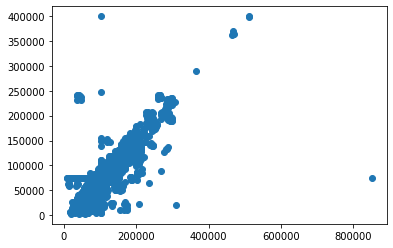

In [149]:
plt.scatter(x='value' , y='mortdue' ,data=df)

In [150]:
bad_credit =  pd.crosstab(index = df["bad"], columns = df["job"] , normalize = True )
bad_credit.index= ["odedi","odemedi"]
bad_credit

job,Mgr,Office,Other,ProfEx,Sales,Self
odedi,0.098993,0.138143,0.350112,0.178691,0.012025,0.022651
odemedi,0.029922,0.020973,0.096756,0.035794,0.006432,0.009508


In [151]:
df['reason'].value_counts()

DebtCon    2518
HomeImp    1058
Name: reason, dtype: int64

In [152]:
bad_credit =  pd.crosstab(index = df["bad"], columns = df["reason"], normalize = True)
bad_credit.index= ["odedi","odemedi"]
bad_credit

reason,DebtCon,HomeImp
odedi,0.572987,0.227629
odemedi,0.131152,0.068233


In [153]:
bad_credit =  pd.crosstab(index = df["reason"], columns = df["job"], normalize = True)
bad_credit.index= ["debtcon","homelmp"]
bad_credit

job,Mgr,Office,Other,ProfEx,Sales,Self
debtcon,0.099832,0.109340,0.319351,0.145134,0.016779,0.013702
homelmp,0.029083,0.049776,0.127517,0.069351,0.001678,0.018456


In [ ]:
loan = df['loan']

In [129]:
birler = df[df.bad > 0 ]['loan']

In [126]:
sıfırlar = df[df.bad < 1 ]['loan']

In [137]:
shapiro(birler) #p < 0.05 Ho red normal dagıldıgını reddettim

(0.8642619848251343, 2.403162984699039e-24)

In [139]:
shapiro(sıfırlar)

(0.8353631496429443, 0.0)

In [140]:
levene(sıfırlar , birler) ## varyanslar homojen degil

LeveneResult(statistic=6.342735297730182, pvalue=0.011829622490936536)

In [141]:
stats.ttest_ind(birler ,sıfırlar, equal_var = False )

Ttest_indResult(statistic=-4.088942403943692, pvalue=4.669150032338557e-05)

In [47]:
##df.groupby(['bad','reason'])[['value']].mean().sort_values('value', ascending=False)

In [5]:
dfa = df.copy()

In [19]:
#from sklearn.preprocessing import LabelEncoder
#y = LabelEncoder().fit_transform(df['bad'])

In [6]:
dfa['bad'].value_counts()

0    2863
1     713
Name: bad, dtype: int64

In [54]:
#y = LabelEncoder().fit_transform(df['bad'])
#X=dfa.drop(['bad','reason','job'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3576 non-null float64
value      3576 non-null float64
reason     3576 non-null object
job        3576 non-null object
yoj        3576 non-null float64
derog      3576 non-null float64
delinq     3576 non-null float64
clage      3576 non-null float64
ninq       3576 non-null float64
clno       3576 non-null float64
debtinc    3576 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [56]:
df=pd.get_dummies(df, columns = ["job","reason"], drop_first = True)

In [57]:
y = df['bad']
X=df.drop(['bad'], axis = 1)

In [58]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.320421
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3560
Method:                           MLE   Df Model:                           15
Date:                Wed, 05 Aug 2020   Pseudo R-squ.:                  0.3586
Time:                        22:20:33   Log-Likelihood:                -1145.8
converged:                       True   LL-Null:                       -1786.4
Covariance Type:            nonrobust   LLR p-value:                6.064e-264
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -1.512e-05   5.48e-06     -2.757      0.006   -2.59e-05   -4.37e-06
mortdue        -4.667e-06   2.04e-06     -2.288      0.022   -8.66e-06    -6.7e-07
value           1.093e-06   1.58e-06      0.693      0.488      -2e-06    4.18e-06
yoj               -0.0317      0.008     -3.805      0.000      -0.048      -0.015
derog              0.4130      0.066      6.239      0.000       0.283       0.543
delinq             0.7096      0.057     12.365      0.000       0.597       0.822
clage             -0.0076      0.001     -9.722      0.000      -0.009      -0.006
ninq               0.0719      0.030      2.425      0.015       0.014       0.130
clno              -0.0305      0.006     -5.063      0.000      -0.042      -0.019
debtinc            0.0178      0.001     22.787      0.000       0.016       0.019
job_Office        -1.4259      0.189     -7.536      0.000      -1.797      -1.055
job_Other         -0.8218      0.130     -6.318      0.000      -1.077      -0.567
job_ProfEx        -0.7645      0.174     -4.398      0.000      -1.105      -0.424
job_Sales          0.2782      0.357      0.780      0.435      -0.421       0.977
job_Self          -0.1145      0.312     -0.367      0.713      -0.725       0.496
reason_HomeImp     0.0256      0.120      0.213      0.831      -0.210       0.261
==================================================================================
"""

In [59]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
loj_model.intercept_

array([-0.00122101])

In [62]:
loj_model.coef_

array([[-2.22405626e-05, -6.68756825e-06, -3.26185943e-08,
        -1.00348417e-02,  2.52481980e-03,  5.20567477e-03,
        -9.48212374e-03,  1.68192543e-03, -1.03785320e-02,
         1.79468618e-02, -6.21189630e-04, -6.90785077e-04,
        -1.87813965e-04,  1.05832009e-04,  1.37828090e-04,
        -2.24447145e-04]])

In [63]:
y_pred = loj_model.predict(X)

In [64]:
confusion_matrix(y,y_pred)

array([[2665,  198],
       [ 348,  365]], dtype=int64)

In [65]:
accuracy_score(y,y_pred)

0.8473154362416108

In [66]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2863
           1       0.65      0.51      0.57       713

    accuracy                           0.85      3576
   macro avg       0.77      0.72      0.74      3576
weighted avg       0.84      0.85      0.84      3576



In [67]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [68]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.95573256, 0.04426744],
       [0.8659558 , 0.1340442 ],
       [0.79538072, 0.20461928],
       [0.85884585, 0.14115415],
       [0.83778188, 0.16221812],
       [0.77996489, 0.22003511],
       [0.9546202 , 0.0453798 ],
       [0.8944304 , 0.1055696 ],
       [0.92170122, 0.07829878],
       [0.86782386, 0.13217614]])

In [69]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: bad, dtype: int64

In [70]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [71]:
y_probs[0:10]

array([0.04426744, 0.1340442 , 0.20461928, 0.14115415, 0.16221812,
       0.22003511, 0.0453798 , 0.1055696 , 0.07829878, 0.13217614])

In [72]:
y_pred = [1 if i > 0.4 else 0 for i in y_probs]

In [73]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [74]:
confusion_matrix(y,y_pred)

array([[2615,  248],
       [ 300,  413]], dtype=int64)

In [75]:
accuracy_score(y,y_pred)

0.8467561521252797

In [76]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2863
           1       0.62      0.58      0.60       713

    accuracy                           0.85      3576
   macro avg       0.76      0.75      0.75      3576
weighted avg       0.84      0.85      0.84      3576



In [77]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.04426744, 0.1340442 , 0.20461928, 0.14115415, 0.16221812])

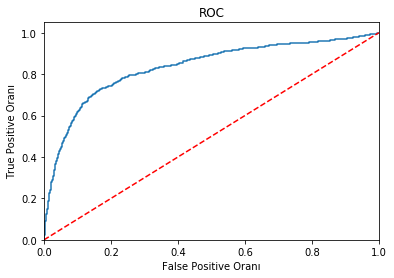

In [78]:
logit_roc_auc = roc_auc_score(y,loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1] )
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()


In [79]:
logit_roc_auc

0.7213816164940414

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state = 42)

In [81]:
loj = LogisticRegression(solver= 'liblinear')
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
accuracy_score(y_test, loj_model.predict(X_test))

0.8533519553072626

In [83]:
y_pred = loj_model.predict(X_test)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       591
           1       0.60      0.48      0.53       125

    accuracy                           0.85       716
   macro avg       0.75      0.71      0.72       716
weighted avg       0.84      0.85      0.85       716



In [85]:
cross_val_score(loj_model , X_test, y_test , cv = 10).mean()

0.8535918708598624